<a href="https://colab.research.google.com/github/YaregalAssabie/EthioReader/blob/main/SimpleOCRminst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
60000 train samples
10000 test samples


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,706 (2.55 MB)

 Trainable params: 669,706 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8570 - loss: 0.4499 - val_accuracy: 0.9680 - val_loss: 0.1027
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9668 - loss: 0.1098 - val_accuracy: 0.9700 - val_loss: 0.0946
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9780 - loss: 0.0709 - val_accuracy: 0.9767 - val_loss: 0.0808
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9814 - loss: 0.0602 - val_accuracy: 0.9811 - val_loss: 0.0634
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9855 - loss: 0.0461 - val_accuracy: 0.9824 - val_loss: 0.0608
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9885 - loss: 0.0364 - val_accuracy: 0.9803 - val_loss: 0.0739
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 29ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9812 - val_loss: 0.0722
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9912 - loss: 0.0271 - v

Test loss: 0.09876850247383118
Test accuracy: 0.983299970626831


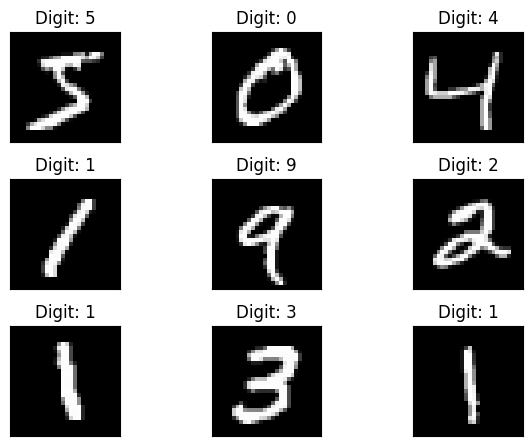

In [1]:
# Import basic libraries and keras
import os
import keras
import numpy as np
import tensorflow as tf

from keras.layers import Dense, Dropout
from keras.models import Sequential, load_model

# Read the MNIST data and split to train and test
from tensorflow.keras.datasets import mnist


#f = np.load('mnist.npz')


(x_train, y_train),  (x_test, y_test) = mnist.load_data()

# Optionally plot some images
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

# Reshape from (num_samples, 28, 28) to (num_samples, 784)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
# Change type from int to float and normalize to [0, 1]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Optionally check the number of samples
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices (transform the problem to multi-class classification)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Check if there is a pre-trained model
if not os.path.exists('model.h5'):
    # Create a neural network with 3 dense layers
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1,
              validation_data=(x_test, y_test))

    # Save the model
    model.save('model.h5')

else:
    # Load the model from disk
    model = load_model('model.h5')

# Get loss and accuracy on validation set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])